# Lab 8: Regression

The following tutorial contains Python examples for Linear Regression. It is based on Chapter 42 of VanderPlas. Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

In [1]:
# Start with the standard imports

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## 8.1 Linear Regression

The most basic form of linear regression involves taking a straight line (of the form $y=mx+c$) that best fits the data in the sense that the error distance between the data points and the line are minimised. For example, in the following we have data scattered about a line with slope $m=2$ and intercept $c=-5$.

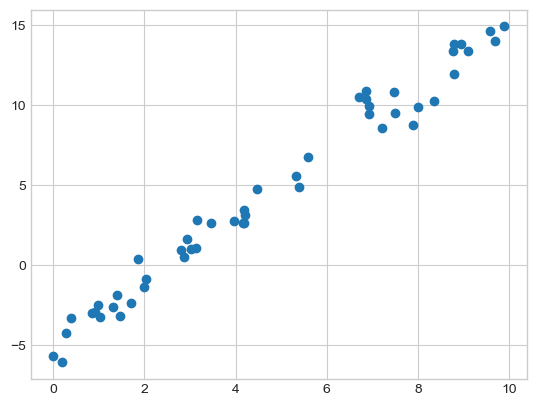

In [2]:
rng = np.random.RandomState(1)
x = 10* rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

We then use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line.

Model slope: 2.027208810360696
Model intercept: -4.9985770855532055


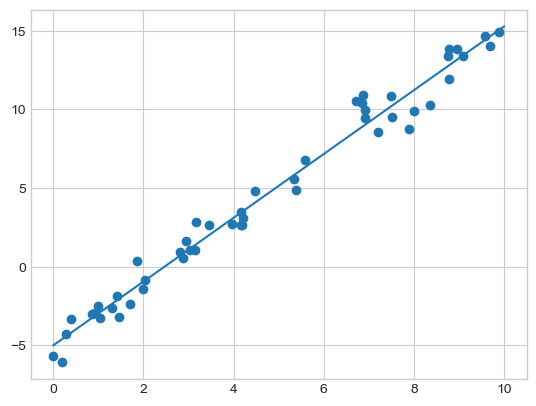

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)

As we can see, the results are close to the values used to generate the data.

As we have seen in the notes, we can generalise the above to higher dimensional linear hyperplanes, i.e. those represented by $y=a_0+a_1x_1+a_2x_2+\cdots+a_nx_n$. In general, these are more difficult to visualise, but we can see one of these fits in action by building some example data using NumPy's matrix multiplication operator.

In [4]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000091
[ 1.5 -2.   1. ]


This time, we have a linear combination of three random variables $x_1,\,x_2,\,x_3$. The linear regression recovers the coefficients used to construct the data. In this way, we can use the single LinearRegression estimator to fit lines, planes, or
hyperplanes to our data.

__Exercise:__ Repeat the above for data scattered about a line with slope $-1$ and intercept $2$

## 8.2 Polynomial Function Regression

While linear regression is useful, it would be naive to expect all (or even most) data to fit to a linear relationship. As such, we inevitably want to model _non-linear_ relationships. One trick is to transform the data according to _basis functions_. The idea is to take our multidimensional linear model $y=a_0+a_1x_1+a_2x_2+\cdots+a_nx_n$ and built the $x_i$ from our single-dimensional input $x$. Specifically, we let $x_i=f_i(x)$, where $f_i(x)$ is some function that transforms our data.

An straightforward example of this is when $f_i(x)=x^i$. In this case, our model becomes polynomial regression where $y=a_0+a_1x+a_2x^2+a_3x^3_\cdots+a_nx_n$. This polynomial 'projection' is useful enough that it is built into Scikit-Learn, using the `PolynomialFeatures` transformer.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

The transformer has converted our 1-dimensional array into a 3-dimensional array where each column contains the exponentiated value. This new, higher-dimensional data representation can then be plugged into a linear regression. A nice way to accomplish this is to use a pipeline. We can now make a 7th-degree polynomial model in this way.

In [6]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

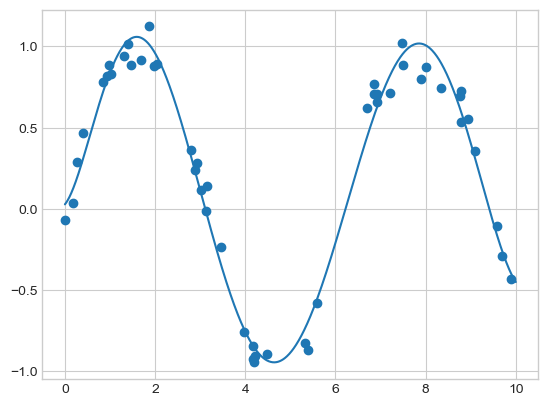

In [7]:
# A sine wave with noise
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

Of course, other basis functions are possible, e.g. fitting a model that is a sum of Gaussian bases. It is left as an exercise to read pp. 424-429 of VanderPlas for a discussion of this along with regularisation.

## 8.3 Logistic Regression

This is another regression model and is used when our dependent variable is binary (i.e. we have 2 outputs). An example we will see below is whether a person will survive an accident or not, but other examples include students passing or failing an exam, or a medical test being positive or negative. Straight away, we see a difference with linear regression, in which the dependent variable was continuous. As such, this offers us a tool in a very different kind of situation.

Now for our example. We will use a classic dataset from Kaggle about passenger survival rates on the _Titanic_ (www.kaggle.com/c/titanic). First, we load this dataset using pandas.

In [8]:
import pandas as pd

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We have a training set and a test set. The basic idea is to use the training set to _train_ our model, and then _test_ the accuracy of this model with a test set.

In [9]:
# First we check if there is any missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

A good predictor of survivability is _Age_, however we observe this has missing data. As such, we need to address this. For simplicity, we use the median.

In [11]:
median_age = train['Age'].median()

train['Age'] = train['Age'].fillna(median_age)
test['Age'] = test['Age'].fillna(median_age)

Another variable we might expect is the sex of a passenger. We add another column which represents this as an integer.

In [12]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [13]:
# Another predictor might be the passenger's class. We add this, along with Age and IsFemale to a list
predictors = ['Age', 'IsFemale', 'Pclass']

X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values

Like other `Series`, arithmetic operations between differently indexed time series automatically aligns on the dates.

In [14]:
X_train[:10]

array([[22.,  0.,  3.],
       [38.,  1.,  1.],
       [26.,  1.,  3.],
       [35.,  1.,  1.],
       [35.,  0.,  3.],
       [28.,  0.,  3.],
       [54.,  0.,  1.],
       [ 2.,  0.,  3.],
       [27.,  1.,  3.],
       [14.,  1.,  2.]])

We can index and select data based on labels, just like any other `pd.Series'.

In [15]:
y_train[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Now we can form predictions for the test dataset
y_predict = model.predict(X_test)

y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

We do not have the actual survivor values for the test dataset (it is part of a competition). However, if we did then we would form `y_true` and then compute some error metric based on this, e.g. `(y_true == y_predict).mean()`.

This is, of course, a very simple approach to the problem and in general we should be aware of problems such as overfitting. There are a variety of techniques to help with this (e.g. cross-validation) but this is left to the reader as an exercise.

__Exercise:__ Take the economy .csv file and check for linearity (i.e. check that a linear relationship exists between the dependent and independent variable(s)). You should see that a linear relationship exists between `index_price` and `interest_rate`, and between `index_price` and `unemployment_rate`. Once done, perform multiple linear regression on the data.

__Exercise:__ Return to the Fremont Bridge data set discussed in VanderPlas. You will now join the bike data with another data set `SeattleWeather.csv`. You are tasked with performing a simple linear regression to determine the extent to which weather and seasonal factors (temperature, precipitation, daylight hours) affect the volume of bicycle traffic on this bridge in Seattle. For simplicity, look at data prior to 2020 to avoid the effects of COVID-19.

The National Oceanic and Atmospheric Administration (NOAA) makes its daily weather statation available and VanderPlas used station iD USW00024233.

To accomplish this task, you may want to consider the following sub-tasks:

- We have seen previously that patterns of use vary from day to day (in particular from that of weekdays to that of weekends). Account for this and put daily traffic data in its own DataFrame.
- Holidays are likely to affect traffic on the bridge. Add an indicator for this.
- Hours of daylight will also likely affect traffic on the bridge. Add an indicator for this.
- Add average temperature to the data.
- Add total precipitation to the data. Also, add a flag which indicates whether a day is dry (has zero pricipitation).
- Choose which columns to use and fit a linear regression model to the data.